In [1]:
import pandas as pd 
df = pd.read_csv(r"values.csv")
print(df.head())
print(df.info())
print(df.describe())

    A(410)   B(435)   C(460)   D(485)   E(510)   F(535)  G(560)  H(585)  \
0  2429.58  1108.99  2091.93   737.33   835.14  1376.82  322.87  318.87   
1  1707.90   725.38  1974.49   670.81   835.93  1685.28  370.31  373.60   
2  1750.41  1102.02  2481.05   816.80   960.65  1741.43  430.51  437.88   
3  2546.68  1548.40  2791.56  1007.16  1128.00  1573.73  488.66  499.63   
4  3090.54  1266.42  2933.88   940.61  1109.84  2047.64  500.91  512.70   

    R(610)  I(645)  ...  P   (kg/ha)  K (kg/ha)  Ca (meq/100g)  Mg (meq/100g)  \
0  1305.33  163.26  ...        26.10     444.00           6.14           2.32   
1  1335.77  185.56  ...        81.99     372.00           5.98           0.50   
2  1206.99  227.04  ...        80.59     132.00           3.15           2.49   
3  1338.11  261.84  ...        33.81     221.76           3.40           1.90   
4  1482.11  267.19  ...        38.19     234.08           6.60           5.20   

   S (ppm)  Fe (ppm)  Mn (ppm)  Cu (ppm)  Zn (ppm)  B (ppm)  


In [2]:
df = df.dropna()

In [3]:
print(df.columns)

Index(['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
       'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)', 'V(810)',
       'W(860)', 'K(900)', 'L(940)', 'T(730)', 'pH', 'EC  (dS/m)', 'OC (%)',
       'P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)',
       'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'],
      dtype='object')


LINEAR REGRESSION

Index(['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
       'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)', 'V(810)',
       'W(860)', 'K(900)', 'L(940)', 'T(730)', 'pH', 'EC  (dS/m)', 'OC (%)',
       'P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)',
       'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'],
      dtype='object')
Mean Squared Error: 3.9371776423476215


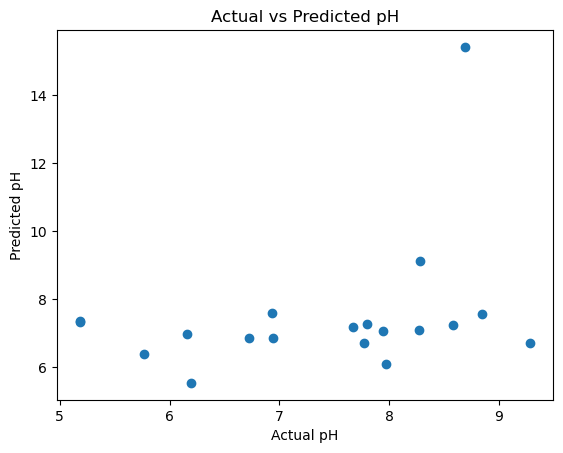

Model Coefficients:
A(410): 0.0002260994690291418
B(435): -0.0025785282171478835
C(460): 0.001987529639323101
D(485): -0.00011023895229521667
E(510): -0.001459915126258508
F(535): 0.00046688074538017504
G(560): 0.011558794524357239
H(585): 0.0062484055420995955
R(610): -5.8730619106738317e-05
I(645): -0.04339182230177661
S(680): -0.0027208955720650586
J(705): -0.004662939506855338
U(760): 0.01523483346294592
V(810): -0.019452699318195044
W(860): 0.01711915448303358
K(900): -0.034249753436578795
L(940): 0.15207933535629045
T(730): -0.05271336641766477


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'values.csv')

# Print the column names to verify
print(df.columns)

# Update the list with actual column names for the 18 wavelength columns
wavelength_columns = [
    'A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
       'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)', 'V(810)',
       'W(860)', 'K(900)', 'L(940)', 'T(730)'
]

# Check if 'pH' is in the dataframe columns
if 'pH' not in df.columns:
    raise ValueError("'pH' column not found in the dataset")

# Ensure all wavelength columns are in the dataframe
for col in wavelength_columns:
    if col not in df.columns:
        raise ValueError(f"'{col}' column not found in the dataset")

# Convert wavelength columns and 'pH' to numeric, forcing errors to NaN
df[wavelength_columns] = df[wavelength_columns].apply(pd.to_numeric, errors='coerce')
df['pH'] = pd.to_numeric(df['pH'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=wavelength_columns + ['pH'], inplace=True)

# Define X and y
X = df[wavelength_columns]
y = df['pH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted pH values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual pH")
plt.ylabel("Predicted pH")
plt.title("Actual vs Predicted pH")
plt.show()

# Optionally, print the model coefficients
print("Model Coefficients:")
for wavelength, coef in zip(wavelength_columns, model.coef_):
    print(f"{wavelength}: {coef}")


RANDOM FOREST REGRESSION

Index(['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
       'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)', 'V(810)',
       'W(860)', 'K(900)', 'L(940)', 'T(730)', 'pH', 'EC  (dS/m)', 'OC (%)',
       'P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)',
       'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'],
      dtype='object')
Mean Squared Error: 1.3396307071944704


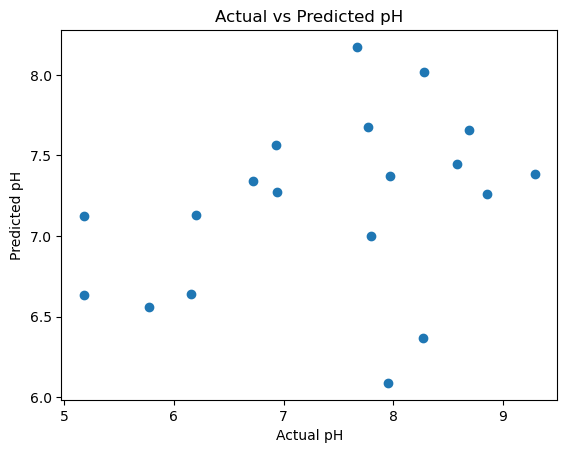

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'values.csv')

# Print the column names to verify
print(df.columns)

# Update the list with actual column names for the 18 wavelength columns
wavelength_columns = [
    'A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
       'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)', 'V(810)',
       'W(860)', 'K(900)', 'L(940)', 'T(730)'
]

# Check if 'pH' is in the dataframe columns
if 'pH' not in df.columns:
    raise ValueError("'pH' column not found in the dataset")

# Ensure all wavelength columns are in the dataframe
for col in wavelength_columns:
    if col not in df.columns:
        raise ValueError(f"'{col}' column not found in the dataset")

# Convert wavelength columns and 'pH' to numeric, forcing errors to NaN
df[wavelength_columns] = df[wavelength_columns].apply(pd.to_numeric, errors='coerce')
df['pH'] = pd.to_numeric(df['pH'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=wavelength_columns + ['pH'], inplace=True)

# Define X and y
X = df[wavelength_columns]
y = df['pH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted pH values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual pH")
plt.ylabel("Predicted pH")
plt.title("Actual vs Predicted pH")
plt.show()

# # Optionally, print the model coefficients
# print("Model Coefficients:")
# for wavelength, coef in zip(wavelength_columns, model.coef_):
#     print(f"{wavelength}: {coef}")


Index(['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
       'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)', 'V(810)',
       'W(860)', 'K(900)', 'L(940)', 'T(730)', 'pH', 'EC  (dS/m)', 'OC (%)',
       'P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)',
       'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'],
      dtype='object')
Mean Squared Error: 1.3396307071944704


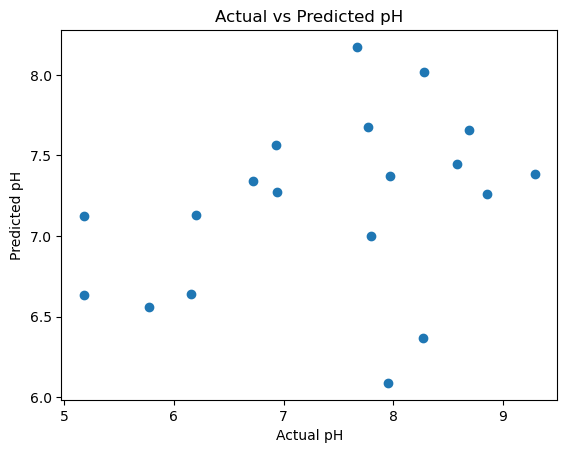

Please enter the values for the following wavelengths:
Predicted pH value: 6.239721428571432


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'values.csv')

# Print the column names to verify
print(df.columns)

# Update the list with actual column names for the 18 wavelength columns
wavelength_columns = [
    'A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
       'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)', 'V(810)',
       'W(860)', 'K(900)', 'L(940)', 'T(730)'
]

# Check if 'pH' is in the dataframe columns
if 'pH' not in df.columns:
    raise ValueError("'pH' column not found in the dataset")

# Ensure all wavelength columns are in the dataframe
for col in wavelength_columns:
    if col not in df.columns:
        raise ValueError(f"'{col}' column not found in the dataset")

# Convert wavelength columns and 'pH' to numeric, forcing errors to NaN
df[wavelength_columns] = df[wavelength_columns].apply(pd.to_numeric, errors='coerce')
df['pH'] = pd.to_numeric(df['pH'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=wavelength_columns + ['pH'], inplace=True)

# Define X and y
X = df[wavelength_columns]
y = df['pH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted pH values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual pH")
plt.ylabel("Predicted pH")
plt.title("Actual vs Predicted pH")
plt.show()

# Function to predict pH from user input
def predict_pH_from_user_input():
    print("Please enter the values for the following wavelengths:")
    user_input = []
    for col in wavelength_columns:
        value = float(input(f"{col}: "))
        user_input.append(value)
    
    user_input_df = pd.DataFrame([user_input], columns=wavelength_columns)
    predicted_pH = model.predict(user_input_df)[0]
    print(f"Predicted pH value: {predicted_pH}")


predict_pH_from_user_input()


In [3]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
data = pd.read_csv("preprocessed_data.csv")  # Replace with the path to your dataset file

# Define feature and target columns (make sure these columns exist in your dataset)
feature_columns = ['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
                   'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)',
                   'V(810)', 'W(860)', 'K(900)', 'L(940)', 'T(730)']
target_columns = ['P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)',
             'S (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)']

# Check if all required columns are present in the dataset
missing_features = [col for col in feature_columns if col not in data.columns]
missing_targets = [col for col in target_columns if col not in data.columns]

if missing_features:
    raise ValueError(f"Missing feature columns: {missing_features}")

if missing_targets:
    raise ValueError(f"Missing target columns: {missing_targets}")

# Separate features (X) and target variables (y)
X = data[feature_columns]
y = data[target_columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Random Forest Regressor model for multiple target variables
rfr = RandomForestRegressor(random_state=42)

# Wrap Random Forest Regressor in MultiOutputRegressor to handle multiple outputs
multioutput_rfr = MultiOutputRegressor(rfr)

# Fit the Random Forest Regressor model
multioutput_rfr.fit(X_train_scaled, y_train)

# Predict for the test set
y_pred_rfr = multioutput_rfr.predict(X_test_scaled)


# Calculate performance metrics
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print("Random Forest Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_rfr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rfr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr:.4f}")
print(f"R² Score: {r2_rfr:.4f}")
# Function to predict nutrient values based on user input wavelengths
def predict_nutrients(wavelengths):
    # Convert the input list to a DataFrame
    user_data = pd.DataFrame([wavelengths], columns=feature_columns)
    
    # Handle missing values
    user_data_imputed = imputer.transform(user_data)
    
    # Scale the data
    user_data_scaled = scaler.transform(user_data_imputed)
    
    # Predict using the trained Random Forest Regressor model
    rfr_prediction = multioutput_rfr.predict(user_data_scaled)
    
    return rfr_prediction

# Function to get user input for wavelengths
def get_user_wavelengths():
    wavelengths = []
    for i in range(len(feature_columns)):
        while True:
            try:
                value = float(input(f"Enter value for {feature_columns[i]}: "))
                wavelengths.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numerical value.")
    return wavelengths

# Get user input
user_wavelengths = get_user_wavelengths()

# Predict nutrient values
rfr_pred = predict_nutrients(user_wavelengths)

# Print the predictions with labels
print("\nRandom Forest Regressor Prediction:")
for nutrient, value in zip(target_columns, rfr_pred[0]):
    print(f"{nutrient}: {value:.2f}")


Random Forest Regressor Performance Metrics:
Mean Squared Error (MSE): 5622.7461
Mean Absolute Error (MAE): 24.3319
Root Mean Squared Error (RMSE): 74.9850
R² Score: -0.2757

Random Forest Regressor Prediction:
P   (kg/ha): 34.35
K (kg/ha): 423.86
Ca (meq/100g): 19.88
Mg (meq/100g): 8.41
S (ppm): 35.97
Fe (ppm): 66.19
Mn (ppm): 41.81
Cu (ppm): 3.11
Zn (ppm): 2.67
B (ppm): 0.72


changes
for all nutrients and wavelength 
r^2 value
accuracy
perfeomance matrix(add)
feature extraction for which wavelength(input) which nutrient(output)
predicted vs actual for all 12 variables (12plots) using rf 
.h5
recording->only project explaining code a little bit 
detailed report  


RF algorithm for wavelength 

Random Forest Regressor Performance Metrics:
Mean Squared Error (MSE): 5622.7461
Mean Absolute Error (MAE): 24.3319
Root Mean Squared Error (RMSE): 74.9850
R² Score: -0.2757

Random Forest Regressor Prediction:
P   (kg/ha): 34.50
K (kg/ha): 457.63
Ca (meq/100g): 22.11
Mg (meq/100g): 8.68
S (ppm): 41.05
Fe (ppm): 72.21
Mn (ppm): 44.36
Cu (ppm): 6.06
Zn (ppm): 2.81
B (ppm): 0.75


C:\Users\Ruchika Venkat\AppData\Local\Temp\ipykernel_28892\2035351206.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(target_columns)).colors  # Using tab10 colormap for distinct colors


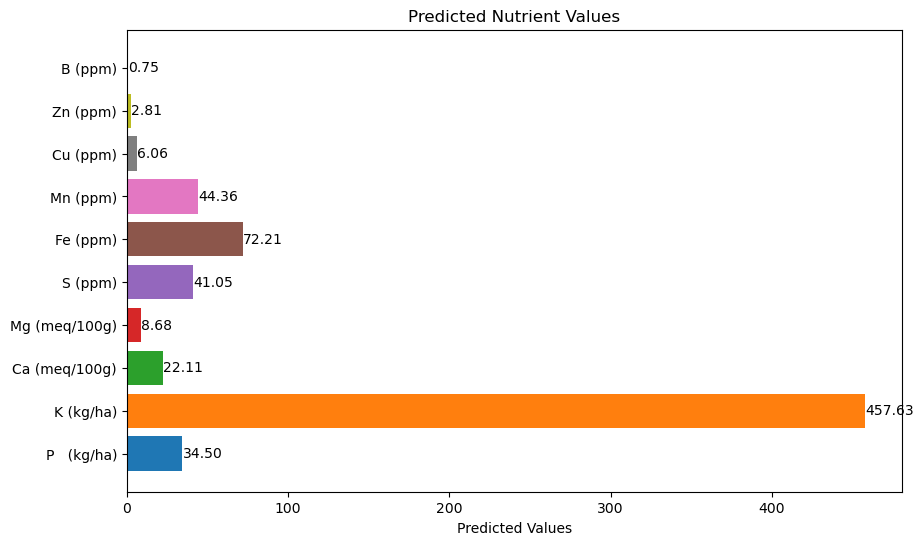

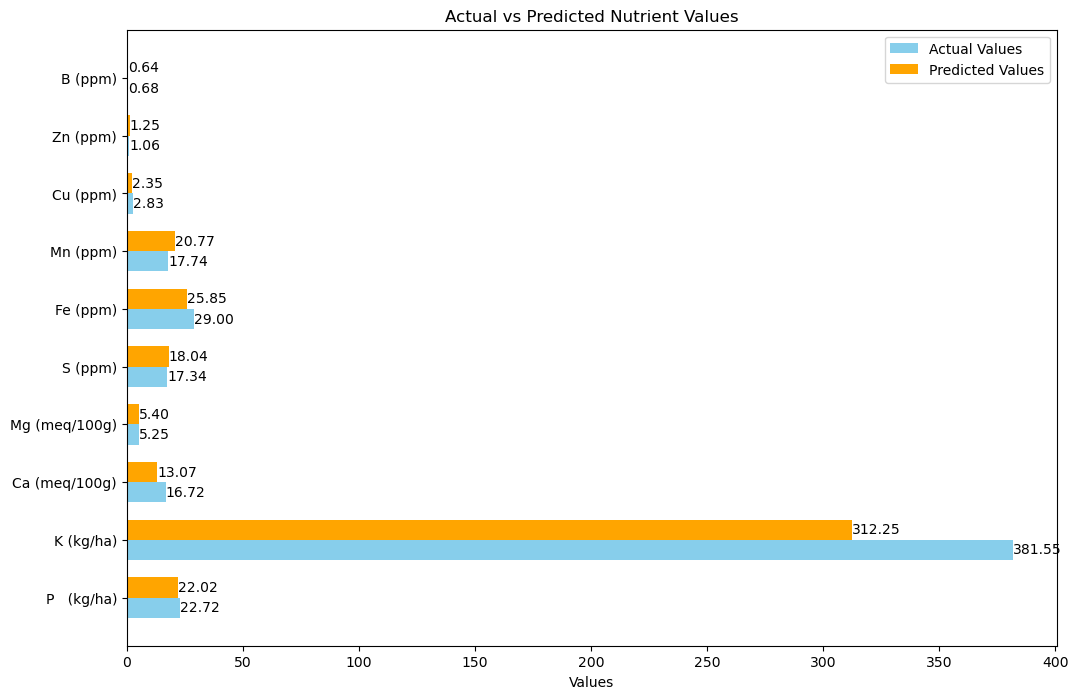

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load your dataset
data = pd.read_csv("preprocessed_data.csv")  # Replace with the path to your dataset file

# Define feature and target columns (make sure these columns exist in your dataset)
feature_columns = ['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
                   'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)',
                   'V(810)', 'W(860)', 'K(900)', 'L(940)', 'T(730)']
target_columns = ['P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)',
             'S (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)']

# Check if all required columns are present in the dataset
missing_features = [col for col in feature_columns if col not in data.columns]
missing_targets = [col for col in target_columns if col not in data.columns]

if missing_features:
    raise ValueError(f"Missing feature columns: {missing_features}")

if missing_targets:
    raise ValueError(f"Missing target columns: {missing_targets}")

# Separate features (X) and target variables (y)
X = data[feature_columns]
y = data[target_columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Random Forest Regressor model for multiple target variables
rfr = RandomForestRegressor(random_state=42)

# Wrap Random Forest Regressor in MultiOutputRegressor to handle multiple outputs
multioutput_rfr = MultiOutputRegressor(rfr)

# Fit the Random Forest Regressor model
multioutput_rfr.fit(X_train_scaled, y_train)

# Predict for the test set
y_pred_rfr = multioutput_rfr.predict(X_test_scaled)

# Calculate performance metrics
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print("Random Forest Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_rfr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rfr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr:.4f}")
print(f"R² Score: {r2_rfr:.4f}")

# Function to predict nutrient values based on user input wavelengths
def predict_nutrients(wavelengths):
    # Convert the input list to a DataFrame
    user_data = pd.DataFrame([wavelengths], columns=feature_columns)
    
    # Handle missing values
    user_data_imputed = imputer.transform(user_data)
    
    # Scale the data
    user_data_scaled = scaler.transform(user_data_imputed)
    
    # Predict using the trained Random Forest Regressor model
    rfr_prediction = multioutput_rfr.predict(user_data_scaled)
    
    return rfr_prediction

# Function to get user input for wavelengths
def get_user_wavelengths():
    wavelengths = []
    for i in range(len(feature_columns)):
        while True:
            try:
                value = float(input(f"Enter value for {feature_columns[i]}: "))
                wavelengths.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numerical value.")
    return wavelengths

# Get user input
user_wavelengths = get_user_wavelengths()

# Predict nutrient values
rfr_pred = predict_nutrients(user_wavelengths)

# Print the predictions with labels
print("\nRandom Forest Regressor Prediction:")
for nutrient, value in zip(target_columns, rfr_pred[0]):
    print(f"{nutrient}: {value:.2f}")

# Create a horizontal bar plot for the predictions
colors = cm.get_cmap('tab10', len(target_columns)).colors  # Using tab10 colormap for distinct colors
plt.figure(figsize=(10, 6))
bars = plt.barh(target_columns, rfr_pred[0], color=colors)
plt.xlabel('Predicted Values')
plt.title('Predicted Nutrient Values')

# Adding values on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

plt.show()

# Plot for actual vs predicted values
plt.figure(figsize=(12, 8))

# Bar width for both actual and predicted values
bar_width = 0.35

# Indices for nutrient labels
indices = np.arange(len(target_columns))

# Plot actual values
actual_bars = plt.barh(indices - bar_width/2, y_test.mean(), bar_width, label='Actual Values', color='skyblue')

# Plot predicted values
predicted_bars = plt.barh(indices + bar_width/2, y_pred_rfr.mean(axis=0), bar_width, label='Predicted Values', color='orange')

# Adding nutrient labels
plt.yticks(indices, target_columns)

# Adding labels and title
plt.xlabel('Values')
plt.title('Actual vs Predicted Nutrient Values')
plt.legend()

# Adding values on the bars
for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
    plt.text(actual_bar.get_width(), actual_bar.get_y() + actual_bar.get_height() / 2, f'{actual_bar.get_width():.2f}', va='center')
    plt.text(predicted_bar.get_width(), predicted_bar.get_y() + predicted_bar.get_height() / 2, f'{predicted_bar.get_width():.2f}', va='center')

plt.show()
